<a href="https://colab.research.google.com/github/7smn2219/AI/blob/main/Access_Recommendation/Access_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Code by Harish

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import defaultdict

# Read data from CSV file
#df = pd.read_csv('user_access.csv')
df = pd.read_csv('/content/user_access_datav1.csv')
grouped_data = df.groupby(["Username","Department", "Job Title"])["Role or Permission"].apply(",".join).reset_index()
#print(grouped_data)
# Separate access values into multiple columns
col_list = pd.Series(df['Role or Permission'].unique()).str.split(',')
dfcollist = col_list .explode()
access_cols = dfcollist.unique()
# Split access column into separate columns
access_values = grouped_data["Role or Permission"].str.split(",")
#print(access_values)
for value in access_cols:
    grouped_data[f"{value.strip()}"] = False
#print(grouped_data)
grouped_data.drop("Role or Permission", axis=1, inplace=True)
for i in range(len(grouped_data)):
    for value in access_values.iloc[i]:
        grouped_data.loc[i, [value]] = True
#print(grouped_data)


# Print the result
#print(combined_df[:,0:2])

#print(grouped_df.mean())  # Example: calculate group means
# Prepare categorical features for clustering
encoded_features = pd.get_dummies(grouped_data[['Department', 'Job Title']])

# Define DBSCAN parameters
eps = 0.5  # Experiment with different values
min_samples = int(0.2 * grouped_data.shape[0])  # Adjust for density

# Create and fit DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(encoded_features)

# Analyze clusters
#for i in range(-1, len(set(dbscan.labels_)) - 1):  # Include noise (-1)
for i in range(-1, len(set(dbscan.labels_)) ):  # Include noise (-1)
    cluster_users = grouped_data.loc[dbscan.labels_ == i]
    #print (cluster_users)
    if cluster_users.shape[0] >= 5  :  # Apply 80% threshold -- Minimum 3 records in the cluster
        common_accesses = []
        for col in access_cols:
            #print(cluster_users[col])
            #print(cluster_users[col].mean())
            if cluster_users[col].mean() >= 0.99:
                common_accesses.append(col)

        if common_accesses:
            #print(f"Cluster {i+1} (Noise if -1): {common_accesses}")
            cluster_info = pd.concat([pd.DataFrame(cluster_users['Department'].unique(), columns=['Department']),
                                     pd.DataFrame(cluster_users['Job Title'].unique(), columns=['Job Title'])], axis=1)
            # Print formatted cluster information
            print(f"Cluster {i+1} (Noise if -1):")
            for index, row in cluster_info.iterrows():
                print(f"  - Department: {row['Department']}, Job Title: {row['Job Title']}")
            print(f"    Common Accesses: {common_accesses}")
"""
            """

Cluster 3 (Noise if -1):
  - Department: Finance, Job Title: Analyst
    Common Accesses: ['Sales_manager', 'Power User Role', 'Report Reviewer', 'Auditor']


'\n            '

#PreViz

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/user_access_datav1.csv") #Source_Data

In [ ]:
(df.head(20))

,First Name,Last Name,Username,Department,Job Title,County,Application Name,Account Name,Role or Permission,EmployeeType
0,John,Donahue,jdonahue,Marketing,Director,Colonia,Active Directory,jdonahue,Sales_manager,Employee
1,John,Donahue,jdonahue,Marketing,Director,Colonia,Active Directory,jdonahue,Operator Role,Employee
2,John,Donahue,jdonahue,Marketing,Director,Colonia,Active Directory,jdonahue,Power User Role,Employee
3,John,Donahue,jdonahue,Marketing,Director,Colonia,Active Directory,jdonahue,Report Reviewer,Employee
4,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Sales_manager,Employee
5,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Operator Role,Employee
6,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Power User Role,Employee
7,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Report Reviewer,Employee
8,Brian,Smith,bsmith,Marketing,Manager,Colonia,Active Directory,bsmith,Auditor,Employee
9,David,Galdeen,dgaldeen,Marketing,Analyst,Colonia,Active Directory,dgaldeen,Sales_manager,Employee


In [ ]:
df.shape

(42, 10)

In [ ]:
list(df.head())

['First Name',
 'Last Name',
 'Username',
 'Department',
 'Job Title',
 'County',
 'Application Name',
 'Account Name',
 'Role or Permission',
 'EmployeeType']

Useful Features

- Username/ Account Name
- Job Title
- Role or Permission
- Application name (potential)

#Data Processing and Feature Engineering

In [ ]:
import csv

input_file = '/content/user_access_datav1.csv'
output_file = 'processed_access_data.csv'

columns_to_keep = ['Username', 'Job Title', 'Role or Permission']

with open(input_file, 'r') as input_csv, open(output_file, 'w', newline='') as output_csv:
    reader = csv.DictReader(input_csv)
    writer = csv.DictWriter(output_csv, fieldnames=columns_to_keep)

    writer.writeheader()

    for row in reader:
        new_row = {col: row[col] for col in columns_to_keep}
        writer.writerow(new_row)

print(f"Data extracted from '{input_file}' and written to '{output_file}'.")

Data extracted from '/content/user_access_datav1.csv' and written to 'processed_access_data.csv'.


In [ ]:
df_processed = pd.read_csv("/content/processed_access_data.csv")

In [ ]:
df_processed.head()

,Username,Job Title,Role or Permission
0,jdonahue,Director,Sales_manager
1,jdonahue,Director,Operator Role
2,jdonahue,Director,Power User Role
3,jdonahue,Director,Report Reviewer
4,bsmith,Manager,Sales_manager


In [ ]:
df_processed.shape

(42, 3)

In [ ]:
list(df_processed.head())

['Username', 'Job Title', 'Role or Permission']

In [ ]:
df = df_processed.iloc[:, [1,2]].values

In [ ]:
df

array([['Director', 'Sales_manager'],
       ['Director', 'Operator Role'],
       ['Director', 'Power User Role'],
       ['Director', 'Report Reviewer'],
       ['Manager', 'Sales_manager'],
       ['Manager', 'Operator Role'],
       ['Manager', 'Power User Role'],
       ['Manager', 'Report Reviewer'],
       ['Manager', 'Auditor'],
       ['Analyst', 'Sales_manager'],
       ['Analyst', 'Operator Role'],
       ['Analyst', 'Power User Role'],
       ['Analyst', 'Report Reviewer'],
       ['Analyst', 'Sales_manager'],
       ['Analyst', 'Operator Role'],
       ['Analyst', 'Power User Role'],
       ['Analyst', 'Report Reviewer'],
       ['Analyst', 'Auditor'],
       ['Analyst', 'Sales_manager'],
       ['Analyst', 'Operator Role'],
       ['Analyst', 'Power User Role'],
       ['Analyst', 'Report Reviewer'],
       ['Analyst', 'Auditor'],
       ['Analyst', 'Sales_manager'],
       ['Analyst', 'Operator Role'],
       ['Analyst', 'Power User Role'],
       ['Analyst', 'Report Rev

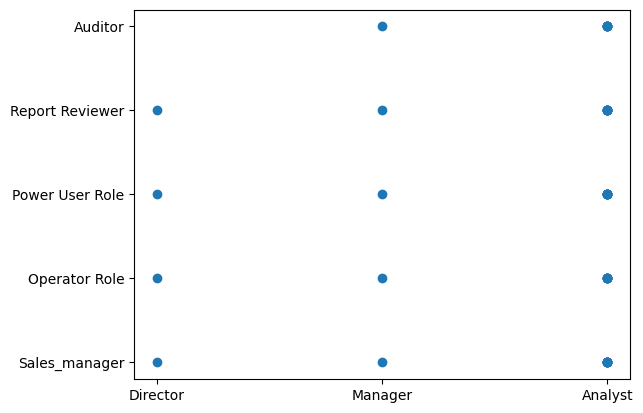

In [ ]:
plt.scatter(df[:,0], df[:,1])

In [ ]:
df = pd.read_csv('/content/processed_access_data.csv')

job_title_mapping = {
    'Director': 1,
    'Manager': 2,
    'Analyst': 3
}

role_permission_mapping = {
    'Sales_manager': 1,
    'Operator Role': 2,
    'Power User Role': 3,
    'Report Reviewer': 4,
    'Auditor': 5
}

df['Job Title'] = df['Job Title'].map(job_title_mapping)
df['Role or Permission'] = df['Role or Permission'].map(role_permission_mapping)

print(df)

df.to_csv('num_processed_access_data.csv', index=False)


     Username  Job Title  Role or Permission
0    jdonahue          1                   1
1    jdonahue          1                   2
2    jdonahue          1                   3
3    jdonahue          1                   4
4      bsmith          2                   1
5      bsmith          2                   2
6      bsmith          2                   3
7      bsmith          2                   4
8      bsmith          2                   5
9    dgaldeen          3                   1
10   dgaldeen          3                   2
11   dgaldeen          3                   3
12   dgaldeen          3                   4
13    dkrause          3                   1
14    dkrause          3                   2
15    dkrause          3                   3
16    dkrause          3                   4
17    dkrause          3                   5
18      ktill          3                   1
19      ktill          3                   2
20      ktill          3                   3
21      kt

In [ ]:
df_num = pd.read_csv("/content/num_processed_access_data.csv")

In [ ]:
df_num.head()

,Username,Job Title,Role or Permission
0,jdonahue,1,1
1,jdonahue,1,2
2,jdonahue,1,3
3,jdonahue,1,4
4,bsmith,2,1


In [ ]:
#skip to phase 2
df_num.shape

(42, 3)

In [ ]:
list(df_num.head())

['Username', 'Job Title', 'Role or Permission']

In [ ]:
df = df_num.iloc[:, [1,2]].values

In [ ]:
df

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 1],
       [3, 3],
       [3, 4],
       [3, 5]])

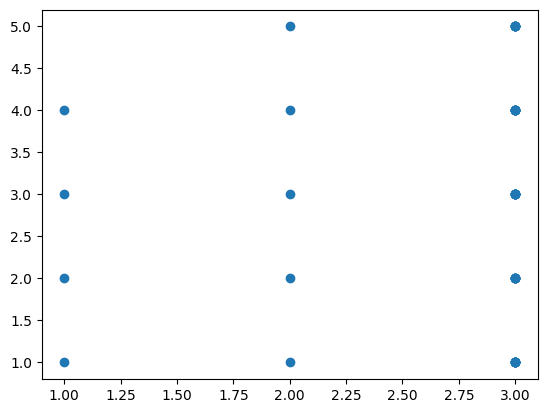

In [ ]:
plt.scatter(df[:,0], df[:,1])

In [ ]:
dbs_clust_model = DBSCAN().fit(df)
dbs_clust_model

DBSCAN()

In [ ]:
print(len(dbs_clust_model.labels_))
print(len(df))


42
42


In [ ]:
print(dbs_clust_model.labels_)


[-1 -1 -1 -1 -1 -1 -1 -1 -1  0  1  2  3  0  1  2  3  4  0  1  2  3  4  0
  1  2  3  4  0  1  2  3  4  0  1  2  3  4  0  2  3  4]


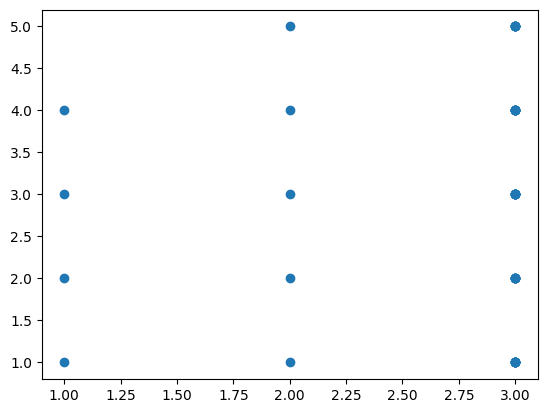

In [ ]:
plt.scatter(df[:,0], df[:,1])

#Phase 2

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('num_processed_access_data.csv')

df.head()

,Username,Job Title,Role or Permission
0,jdonahue,1,1
1,jdonahue,1,2
2,jdonahue,1,3
3,jdonahue,1,4
4,bsmith,2,1


In [ ]:
X = df[['Job Title', 'Role or Permission']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.75, min_samples=1)
clusters = dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters

print(df)


     Username  Job Title  Role or Permission  Cluster
0    jdonahue          1                   1        0
1    jdonahue          1                   2        0
2    jdonahue          1                   3        0
3    jdonahue          1                   4        0
4      bsmith          2                   1        1
5      bsmith          2                   2        1
6      bsmith          2                   3        1
7      bsmith          2                   4        1
8      bsmith          2                   5        1
9    dgaldeen          3                   1        2
10   dgaldeen          3                   2        2
11   dgaldeen          3                   3        2
12   dgaldeen          3                   4        2
13    dkrause          3                   1        2
14    dkrause          3                   2        2
15    dkrause          3                   3        2
16    dkrause          3                   4        2
17    dkrause          3    

In [ ]:
df.to_csv('access_control_clustered.csv', index=False)

In [ ]:
grouped = df.groupby('Cluster')
for cluster, group in grouped:
    print(f"\nCluster {cluster}:")
    print(group[['Job Title', 'Role or Permission']])



Cluster 0:
   Job Title  Role or Permission
0          1                   1
1          1                   2
2          1                   3
3          1                   4

Cluster 1:
   Job Title  Role or Permission
4          2                   1
5          2                   2
6          2                   3
7          2                   4
8          2                   5

Cluster 2:
    Job Title  Role or Permission
9           3                   1
10          3                   2
11          3                   3
12          3                   4
13          3                   1
14          3                   2
15          3                   3
16          3                   4
17          3                   5
18          3                   1
19          3                   2
20          3                   3
21          3                   4
22          3                   5
23          3                   1
24          3                   2
25          3          

In [ ]:
import numpy as np

import numpy as np

new_user = pd.DataFrame({'Job Title': [2], 'Role or Permission': [4]})

new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    distance = np.linalg.norm(new_user_scaled - centroid)
    distances.append((cluster[0], distance))

nearest_cluster = min(distances, key=lambda x: x[1])[0]

suggested_role = df[df['Cluster'] == nearest_cluster]['Role or Permission'].mode()[0]

persons_with_role = df[(df['Cluster'] == nearest_cluster) &
                       (df['Role or Permission'] == suggested_role)]

print(f"Suggested Role for the new user: {suggested_role}")
print("Persons with this role in the cluster:")
print(persons_with_role[['Username', 'Job Title', 'Role or Permission']])

new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    distance = np.linalg.norm(new_user_scaled - centroid)
    distances.append((cluster[0], distance))

nearest_cluster = min(distances, key=lambda x: x[1])[0]

suggested_role = df[df['Cluster'] == nearest_cluster]['Role or Permission'].mode()[0]

persons_with_role = df[(df['Cluster'] == nearest_cluster) &
                       (df['Role or Permission'] == suggested_role)]

print(f"Suggested Role for the new user: {suggested_role}")
print("Persons with this role in the cluster:")
print(persons_with_role[['Username', 'Job Title', 'Role or Permission']])


Suggested Role for the new user: 1
Persons with this role in the cluster:
  Username  Job Title  Role or Permission
4   bsmith          2                   1
Suggested Role for the new user: 1
Persons with this role in the cluster:
  Username  Job Title  Role or Permission
4   bsmith          2                   1


job_title_mapping = {
    'Director': 1,
    'Manager': 2,
    'Analyst': 3
}

role_permission_mapping = {
    'Sales_manager': 1,
    'Operator Role': 2,
    'Power User Role': 3,
    'Report Reviewer': 4,
    'Auditor': 5
}

In [ ]:
import numpy as np
import pandas as pd

new_user = pd.DataFrame({'Job Title': [3], 'Role or Permission': [2]})

new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    distance = np.linalg.norm(new_user_scaled - centroid)
    distances.append((cluster[0], distance))


nearest_cluster = min(distances, key=lambda x: x[1])[0]

roles_in_cluster = df[df['Cluster'] == nearest_cluster]['Role or Permission']
most_common_roles = roles_in_cluster.mode()


persons_with_roles = df[(df['Cluster'] == nearest_cluster) &
                        (df['Role or Permission'].isin(most_common_roles))]


print(f"Suggested Role(s) for the new user: {', '.join(map(str, most_common_roles))}")
print("Persons with these roles in the cluster:")
print(persons_with_roles[['Username', 'Job Title', 'Role or Permission']])


Suggested Role(s) for the new user: 1, 3, 4
Persons with these roles in the cluster:
     Username  Job Title  Role or Permission
9    dgaldeen          3                   1
11   dgaldeen          3                   3
12   dgaldeen          3                   4
13    dkrause          3                   1
15    dkrause          3                   3
16    dkrause          3                   4
18      ktill          3                   1
20      ktill          3                   3
21      ktill          3                   4
23   jjackson          3                   1
25   jjackson          3                   3
26   jjackson          3                   4
28     dkress          3                   1
30     dkress          3                   3
31     dkress          3                   4
33  jpisarski          3                   1
35  jpisarski          3                   3
36  jpisarski          3                   4
38    dharris          3                   1
39    dharris  

In [ ]:
from prettytable import PrettyTable

job_title_mapping = { 'Director': 1, 'Manager': 2, 'Analyst': 3 }
role_permission_mapping = { 'Sales_manager': 1, 'Operator Role': 2, 'Power User Role': 3, 'Report Reviewer': 4, 'Auditor': 5 }

job_title_table = PrettyTable()
job_title_table.field_names = ["Job Title", "Code"]

for title, code in job_title_mapping.items():
    job_title_table.add_row([title, code])

print("Job Title Mapping:")
print(job_title_table)

role_permission_table = PrettyTable()
role_permission_table.field_names = ["Role or Permission", "Code"]

for role, code in role_permission_mapping.items():
    role_permission_table.add_row([role, code])

print("\nRole and Permission Mapping:")
print(role_permission_table)


Job Title Mapping:
+-----------+------+
| Job Title | Code |
+-----------+------+
|  Director |  1   |
|  Manager  |  2   |
|  Analyst  |  3   |
+-----------+------+

Role and Permission Mapping:
+--------------------+------+
| Role or Permission | Code |
+--------------------+------+
|   Sales_manager    |  1   |
|   Operator Role    |  2   |
|  Power User Role   |  3   |
|  Report Reviewer   |  4   |
|      Auditor       |  5   |
+--------------------+------+


#Full Send

job_title_mapping = { 'Director': 1, 'Manager': 2, 'Analyst': 3 }

role_permission_mapping = { 'Sales_manager': 1, 'Operator Role': 2, 'Power User Role': 3, 'Report Reviewer': 4, 'Auditor': 5 }

In [ ]:
job_title_code = [3]
roles_code = [4]

new_user = pd.DataFrame({
    'Job Title': job_title_code * len(roles_code),
    'Role or Permission': roles_code
})
new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    avg_distance = np.mean([np.linalg.norm(new_user_scaled[i] - centroid) for i in range(len(new_user_scaled))])
    distances.append((cluster[0], avg_distance))

nearest_cluster = min(distances, key=lambda x: x[1])[0]

roles_in_cluster = df[df['Cluster'] == nearest_cluster]['Role or Permission']
most_common_roles = roles_in_cluster.mode()

persons_with_roles = df[(df['Cluster'] == nearest_cluster) &
                        (df['Role or Permission'].isin(most_common_roles))]

print(f"Suggested Role(s) for the new user: {', '.join(map(str, most_common_roles))}")
print("Persons with these roles in the cluster:")
print(persons_with_roles[['Username', 'Job Title', 'Role or Permission']])

Suggested Role(s) for the new user: 1, 3, 4
Persons with these roles in the cluster:
     Username  Job Title  Role or Permission
9    dgaldeen          3                   1
11   dgaldeen          3                   3
12   dgaldeen          3                   4
13    dkrause          3                   1
15    dkrause          3                   3
16    dkrause          3                   4
18      ktill          3                   1
20      ktill          3                   3
21      ktill          3                   4
23   jjackson          3                   1
25   jjackson          3                   3
26   jjackson          3                   4
28     dkress          3                   1
30     dkress          3                   3
31     dkress          3                   4
33  jpisarski          3                   1
35  jpisarski          3                   3
36  jpisarski          3                   4
38    dharris          3                   1
39    dharris  

In [ ]:
from prettytable import PrettyTable

job_title = [2]
roles = [2]

new_user = pd.DataFrame({
    'Job Title': job_title * len(roles),
    'Role or Permission': roles
})
new_user_scaled = scaler.transform(new_user)

distances = []
for cluster in grouped:
    cluster_points = X_scaled[clusters == cluster[0]]
    centroid = np.mean(cluster_points, axis=0)
    avg_distance = np.mean([np.linalg.norm(new_user_scaled[i] - centroid) for i in range(len(new_user_scaled))])
    distances.append((cluster[0], avg_distance))

nearest_cluster = min(distances, key=lambda x: x[1])[0]

roles_in_cluster = df[df['Cluster'] == nearest_cluster]['Role or Permission']
most_common_roles = roles_in_cluster.mode()

persons_with_roles = df[(df['Cluster'] == nearest_cluster) &
                        (df['Role or Permission'].isin(most_common_roles))]

print(f"Suggested Role(s) for the new user: {', '.join(map(str, most_common_roles))}")

table = PrettyTable()
table.field_names = ["Username", "Job Title", "Role or Permission"]

for _, row in persons_with_roles[['Username', 'Job Title', 'Role or Permission']].iterrows():
    table.add_row([row['Username'], row['Job Title'], row['Role or Permission']])

print("Persons with these roles in the cluster:")
print(table)


Suggested Role(s) for the new user: 1, 2, 3, 4, 5
Persons with these roles in the cluster:
+----------+-----------+--------------------+
| Username | Job Title | Role or Permission |
+----------+-----------+--------------------+
|  bsmith  |     2     |         1          |
|  bsmith  |     2     |         2          |
|  bsmith  |     2     |         3          |
|  bsmith  |     2     |         4          |
|  bsmith  |     2     |         5          |
+----------+-----------+--------------------+


# R&D

In [ ]:
DATA = pd.read_csv('/content/processed_access_data.csv')

# 1. K-Means Clustering

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

data = DATA.copy()

# One-hot encode Job Title and Role
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[['Job Title', 'Role or Permission']]).toarray()

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
data['Recommended Role Cluster'] = kmeans.fit_predict(encoded_data)

# Get cluster centers and decode
cluster_centers = kmeans.cluster_centers_
decoded_centers = encoder.inverse_transform(cluster_centers)

data['Recommended Role'] = data['Recommended Role Cluster'].apply(lambda x: decoded_centers[x])
data.head(10)


,Username,Job Title,Role or Permission,Recommended Role Cluster,Recommended Role
0,jdonahue,Director,Sales_manager,0,"[Analyst, Sales_manager]"
1,jdonahue,Director,Operator Role,1,"[Analyst, Power User Role]"
2,jdonahue,Director,Power User Role,1,"[Analyst, Power User Role]"
3,jdonahue,Director,Report Reviewer,1,"[Analyst, Power User Role]"
4,bsmith,Manager,Sales_manager,0,"[Analyst, Sales_manager]"
5,bsmith,Manager,Operator Role,1,"[Analyst, Power User Role]"
6,bsmith,Manager,Power User Role,1,"[Analyst, Power User Role]"
7,bsmith,Manager,Report Reviewer,1,"[Analyst, Power User Role]"
8,bsmith,Manager,Auditor,1,"[Analyst, Power User Role]"
9,dgaldeen,Analyst,Sales_manager,0,"[Analyst, Sales_manager]"


!! How to inverse the encoding

<!--
# One-hot encode Job Title and Role
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(data[['Job Title', 'Role or Permission']]).toarray()

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['Recommended Role Cluster'] = kmeans.fit_predict(encoded_data)
-->

# 2. Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

data2 = DATA.copy()

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
data2['Recommended Role Cluster'] = hierarchical.fit_predict(encoded_data)
data2.head()

,Username,Job Title,Role or Permission,Recommended Role Cluster
0,jdonahue,Director,Sales_manager,1
1,jdonahue,Director,Operator Role,1
2,jdonahue,Director,Power User Role,1
3,jdonahue,Director,Report Reviewer,1
4,bsmith,Manager,Sales_manager,1


!! check
<!--
linkage='ward'
 -->

# 3. Latent Dirichlet Allocation (LDA) for Topic Modeling

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

data3 = DATA.copy()

# Combine Job Title and Role for topic extraction
data3['Combined Text'] = data3['Job Title'] + " " + data3['Role or Permission']
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(data3['Combined Text'])

# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
topic_distributions = lda.fit_transform(data_vectorized)

data3['Topic-Based Role'] = topic_distributions.argmax(axis=1)

# Map topics back to Role labels (assuming each topic corresponds to a dominant role)
topic_role_map = { 1: 'Sales_manager', 2 : 'Operator Role', 3: 'Power User Role', 4: 'Report Reviewer', 5: 'Auditor'}

data3['Interpreted Role'] = data3['Topic-Based Role'].map(topic_role_map)

data3.head()

,Username,Job Title,Role or Permission,Combined Text,Topic-Based Role,Interpreted Role
0,jdonahue,Director,Sales_manager,Director Sales_manager,1,Sales_manager
1,jdonahue,Director,Operator Role,Director Operator Role,4,Report Reviewer
2,jdonahue,Director,Power User Role,Director Power User Role,0,NaN
3,jdonahue,Director,Report Reviewer,Director Report Reviewer,1,Sales_manager
4,bsmith,Manager,Sales_manager,Manager Sales_manager,1,Sales_manager


# 4. Matrix Factorization (SVD)

In [ ]:
from sklearn.decomposition import TruncatedSVD
import numpy as np

data4 = DATA.copy()

# Creating a simple user-role matrix
user_role_matrix = pd.get_dummies(data4.set_index('Username')['Role or Permission']).groupby('Username').sum()

# SVD Decomposition
svd = TruncatedSVD(n_components=4)
user_role_matrix_reduced = svd.fit_transform(user_role_matrix)

data4_ = pd.DataFrame(user_role_matrix_reduced, columns=['Sales_manager', 'Operator Role', 'Power User Role', 'Report Reviewer'])
data4_['Username'] = user_role_matrix.index

data4_

,Sales_manager,Operator Role,Power User Role,Report Reviewer,Username
0,2.228416,0.124407,0.136691,0.000000e+00,bsmith
1,1.847865,-0.742020,-0.186552,0.000000e+00,dgaldeen
2,1.800320,0.599295,-0.632213,-2.220446e-16,dharris
3,2.228416,0.124407,0.136691,0.000000e+00,dkrause
4,2.228416,0.124407,0.136691,0.000000e+00,dkress
5,1.847865,-0.742020,-0.186552,0.000000e+00,jdonahue
6,2.228416,0.124407,0.136691,0.000000e+00,jjackson
7,2.228416,0.124407,0.136691,0.000000e+00,jpisarski
8,2.228416,0.124407,0.136691,0.000000e+00,ktill


**No good results**

# 5. Graph-Based Recommendations (Node2Vec)

In [ ]:
pip install node2vec

In [ ]:
import networkx as nx
from node2vec import Node2Vec

data5 = DATA.copy()

# Construct the graph
G = nx.Graph()
for _, row in data5.iterrows():
    G.add_edge(row['Username'], row['Role or Permission'], job_title=row['Job Title'])

# Node2Vec for graph-based embeddings
node2vec = Node2Vec(G, dimensions=16, walk_length=10, num_walks=100, workers=1)
model = node2vec.fit(window=10, min_count=1, batch_words=4)
user_embedding = model.wv['bsmith']
user_embedding


Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 100/100 [00:00<00:00, 1006.00it/s]


array([-3.2318494e-01,  2.6579258e-01, -2.3747763e-02,  2.4106941e-01,
       -3.8545359e-02,  2.1441375e-01,  8.1401920e-01, -1.0385046e-01,
        3.4458634e-01, -1.8043319e-02, -1.4671525e-02,  1.2426038e-01,
        2.4689198e-01,  2.6284999e-05, -4.8245877e-01, -2.4131030e-01],
      dtype=float32)

**looks interesting need to check again**

# 6. Collaborative Filtering (User-User)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

data6 = DATA.copy()

# Creating a user-role matrix
user_role_matrix = pd.get_dummies(data5.set_index('Username')['Role or Permission']).groupby('Username').sum()

# Cosine similarity for collaborative filtering
similarity = cosine_similarity(user_role_matrix)

data6['Recommended Role'] = similarity.argmax(axis=1)
data6.head()

ValueError: Length of values (9) does not match length of index (42)

**Got half code**

# 7. Content-Based Filtering

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity

data7 = DATA.copy()

# Encode Job Title and Role
encoded_features = encoder.fit_transform(data7[['Job Title', 'Role or Permission']]).toarray()
similarity_matrix = cosine_similarity(encoded_features)
data7['Recommended Role'] = similarity_matrix.argmax(axis=1)
data7.head(10)

*!! Gives recommenedation above 5 ??*

# 8. Supervised Machine Learning (Classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data8 = DATA.copy()

# Encode Job Title and Role as numerical labels
job_title_encoder = LabelEncoder()
role_encoder = LabelEncoder()

# Encode Job Title and Role
job_title_encoded = job_title_encoder.fit_transform(data8['Job Title'])
role_encoded = role_encoder.fit_transform(data8['Role or Permission'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(job_title_encoded.reshape(-1, 1), role_encoded, test_size=0.2, random_state=0)

# Train Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# Decode the predictions to the original role labels
predicted_roles = role_encoder.inverse_transform(predictions)
print(predicted_roles)


['Report Reviewer' 'Report Reviewer' 'Report Reviewer' 'Power User Role'
 'Report Reviewer' 'Report Reviewer' 'Report Reviewer' 'Report Reviewer'
 'Report Reviewer']


!! Looks nice but prediction can be combined

# 9. Autoencoders for Role Embedding

In [ ]:
import tensorflow as tf
# from tensorflow.keras import layers, models
from sklearn.preprocessing import OneHotEncoder

data9 = DATA.copy()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Encode Job Title and Role
encoded_data = encoder.fit_transform(data9[['Job Title', 'Role or Permission']])

# Autoencoder Model
input_dim = encoded_data.shape[1]
encoding_dim = 2
input_layer = tf.keras.layers.Input(shape=(input_dim,))
encoder = tf.keras.layers.Dense(encoding_dim, activation="relu")(input_layer)
decoder = tf.keras.layers.Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = models.Model(inputs=input_layer, outputs=decoder)

# Compile and train
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(encoded_data, encoded_data, epochs=50, batch_size=2)
user_embeddings = autoencoder.predict(encoded_data)
user_embedding

!! *Seems half code*

# 10. Hybrid Recommender System

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

alpha = 0.5

data10 = DATA.copy()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Collaborative similarity
user_role_matrix = pd.get_dummies(data10.set_index('Username')['Role or Permission'])

# Collaborative similarity
collaborative_similarity = cosine_similarity(user_role_matrix)

# Content-based similarity on encoded features
content_similarity = cosine_similarity(encoded_features)

# Hybrid recommendation
hybrid_similarity = alpha * collaborative_similarity + (1 - alpha) * content_similarity
data10['Recommended Role Hybrid'] = hybrid_similarity.argmax(axis=1)

data10.head(20)

,Username,Job Title,Role or Permission,Recommended Role Hybrid
0,jdonahue,Director,Sales_manager,0
1,jdonahue,Director,Operator Role,1
2,jdonahue,Director,Power User Role,2
3,jdonahue,Director,Report Reviewer,3
4,bsmith,Manager,Sales_manager,4
5,bsmith,Manager,Operator Role,5
6,bsmith,Manager,Power User Role,6
7,bsmith,Manager,Report Reviewer,7
8,bsmith,Manager,Auditor,8
9,dgaldeen,Analyst,Sales_manager,9


Data generation

In [6]:
import pandas as pd
import random

# Parameters for data generation
departments = ['Marketing', 'Sales', 'Engineering', 'HR', 'Finance']
job_titles = ['Manager', 'Director', 'Engineer', 'Analyst', 'Specialist']
roles = ['Sales_manager', 'Operator Role', 'Power User Role', 'Report Reviewer', 'Auditor',
         'HR Admin', 'Data Analyst', 'Software Engineer', 'Finance Manager']
counties = ['Colonia', 'Downtown', 'Uptown', 'Suburb', 'Midtown']

num_users = 50
roles_per_user_range = (2, 5)

# Generate data
grouped_synthetic_data = []

for i in range(num_users):
    first_name = f'User{i+1}'
    last_name = f'Last{i+1}'
    username = f'user{i+1}'
    department = random.choice(departments)
    job_title = random.choice(job_titles)
    county = random.choice(counties)
    employee_type = 'Employee'
    num_roles = random.randint(*roles_per_user_range)
    assigned_roles = ', '.join(random.sample(roles, num_roles))

    grouped_synthetic_data.append({
        'First Name': first_name,
        'Last Name': last_name,
        'Username': username,
        'Department': department,
        'Job Title': job_title,
        'County': county,
        'EmployeeType': employee_type,
        'Roles': assigned_roles
    })

# Convert to DataFrame
grouped_synthetic_user_data = pd.DataFrame(grouped_synthetic_data)

# Save or print
grouped_synthetic_user_data.to_csv('grouped_user_data.csv', index=False)
print(grouped_synthetic_user_data.head())


  First Name Last Name Username   Department   Job Title   County  \
0      User1     Last1    user1           HR  Specialist  Colonia   
1      User2     Last2    user2  Engineering     Manager  Colonia   
2      User3     Last3    user3  Engineering    Director  Colonia   
3      User4     Last4    user4        Sales     Manager  Midtown   
4      User5     Last5    user5    Marketing  Specialist   Suburb   

  EmployeeType                                              Roles  
0     Employee               Software Engineer, Auditor, HR Admin  
1     Employee       Report Reviewer, Sales_manager, Data Analyst  
2     Employee  Operator Role, Power User Role, Software Engineer  
3     Employee  Finance Manager, Data Analyst, Sales_manager, ...  
4     Employee                             Data Analyst, HR Admin  


In [7]:
grouped_synthetic_user_data

,First Name,Last Name,Username,Department,Job Title,County,EmployeeType,Roles
0,User1,Last1,user1,HR,Specialist,Colonia,Employee,"Software Engineer, Auditor, HR Admin"
1,User2,Last2,user2,Engineering,Manager,Colonia,Employee,"Report Reviewer, Sales_manager, Data Analyst"
2,User3,Last3,user3,Engineering,Director,Colonia,Employee,"Operator Role, Power User Role, Software Engineer"
3,User4,Last4,user4,Sales,Manager,Midtown,Employee,"Finance Manager, Data Analyst, Sales_manager, ..."
4,User5,Last5,user5,Marketing,Specialist,Suburb,Employee,"Data Analyst, HR Admin"
5,User6,Last6,user6,Marketing,Director,Uptown,Employee,"Sales_manager, Data Analyst, HR Admin, Report ..."
6,User7,Last7,user7,Marketing,Specialist,Midtown,Employee,"Data Analyst, HR Admin, Auditor, Sales_manager..."
7,User8,Last8,user8,HR,Analyst,Suburb,Employee,"Data Analyst, Auditor, Report Reviewer"
8,User9,Last9,user9,HR,Engineer,Colonia,Employee,"HR Admin, Data Analyst, Software Engineer"
9,User10,Last10,user10,Marketing,Engineer,Midtown,Employee,"Software Engineer, Power User Role, Report Rev..."


In [8]:
# Split the 'Roles' column into lists of roles
grouped_synthetic_user_data['Role List'] = grouped_synthetic_user_data['Roles'].str.split(', ')

# Create a one-hot encoding for roles
roles_one_hot = pd.get_dummies(grouped_synthetic_user_data['Role List'].explode()).groupby(level=0).max()

# Combine the one-hot encoding with the original dataset
final_data_with_roles = pd.concat([grouped_synthetic_user_data.drop(columns=['Roles', 'Role List']), roles_one_hot], axis=1)

# Display the result
print(final_data_with_roles.head())


  First Name Last Name Username   Department   Job Title   County  \
0      User1     Last1    user1           HR  Specialist  Colonia   
1      User2     Last2    user2  Engineering     Manager  Colonia   
2      User3     Last3    user3  Engineering    Director  Colonia   
3      User4     Last4    user4        Sales     Manager  Midtown   
4      User5     Last5    user5    Marketing  Specialist   Suburb   

  EmployeeType  Auditor  Data Analyst  Finance Manager  HR Admin  \
0     Employee     True         False            False      True   
1     Employee    False          True            False     False   
2     Employee    False         False            False     False   
3     Employee    False          True             True     False   
4     Employee    False          True            False      True   

   Operator Role  Power User Role  Report Reviewer  Sales_manager  \
0          False            False            False          False   
1          False            False     

In [9]:
final_data_with_roles

,First Name,Last Name,Username,Department,Job Title,County,EmployeeType,Auditor,Data Analyst,Finance Manager,HR Admin,Operator Role,Power User Role,Report Reviewer,Sales_manager,Software Engineer
0,User1,Last1,user1,HR,Specialist,Colonia,Employee,True,False,False,True,False,False,False,False,True
1,User2,Last2,user2,Engineering,Manager,Colonia,Employee,False,True,False,False,False,False,True,True,False
2,User3,Last3,user3,Engineering,Director,Colonia,Employee,False,False,False,False,True,True,False,False,True
3,User4,Last4,user4,Sales,Manager,Midtown,Employee,False,True,True,False,False,False,False,True,True
4,User5,Last5,user5,Marketing,Specialist,Suburb,Employee,False,True,False,True,False,False,False,False,False
5,User6,Last6,user6,Marketing,Director,Uptown,Employee,False,True,False,True,False,False,True,True,False
6,User7,Last7,user7,Marketing,Specialist,Midtown,Employee,True,True,False,True,False,False,False,True,True
7,User8,Last8,user8,HR,Analyst,Suburb,Employee,True,True,False,False,False,False,True,False,False
8,User9,Last9,user9,HR,Engineer,Colonia,Employee,False,True,False,True,False,False,False,False,True
9,User10,Last10,user10,Marketing,Engineer,Midtown,Employee,False,False,False,False,True,True,True,True,True


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Step 1: Data Preparation
# Extract user attributes for clustering
user_attributes = final_data_with_roles[['Department', 'Job Title', 'County', 'EmployeeType']]

# Prepare user-role matrix for collaborative filtering
role_columns = final_data_with_roles.columns.difference(
    ['First Name', 'Last Name', 'Username', 'Department', 'Job Title', 'County', 'EmployeeType']
)
user_role_matrix = final_data_with_roles[role_columns]


In [17]:

# Step 2: Clustering
# Encode categorical data for clustering
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_attributes = encoder.fit_transform(user_attributes)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust number of clusters as needed
cluster_labels = kmeans.fit_predict(encoded_attributes)

# Add cluster labels to the dataset
final_data_with_roles['Cluster'] = cluster_labels


In [18]:

# Step 3: Collaborative Filtering
# Function to recommend roles using collaborative filtering
def recommend_roles_collaborative(username, data, role_columns, cluster_labels, cluster_id):
    # Filter data to the user's cluster
    cluster_data = data[data['Cluster'] == cluster_id]
    cluster_roles = cluster_data[role_columns]

    # Calculate user similarities
    user_index = cluster_data['Username'].tolist().index(username)
    user_similarity = cosine_similarity(cluster_roles)[user_index]

    # Aggregate role recommendations based on similar users
    role_scores = cluster_roles.T.dot(user_similarity)
    role_recommendations = pd.Series(role_scores, index=role_columns).sort_values(ascending=False)

    # Exclude roles the user already has
    user_roles = cluster_roles.iloc[user_index]
    recommended_roles = role_recommendations[user_roles == 0]

    return recommended_roles.head(5)  # Top 5 recommendations

# Example: Recommend roles for a user
sample_user = final_data_with_roles.iloc[0]['Username']
sample_cluster_id = final_data_with_roles.iloc[0]['Cluster']
recommended_roles = recommend_roles_collaborative(
    sample_user, final_data_with_roles, role_columns, cluster_labels, sample_cluster_id
)

# Display recommendations
recommended_roles


,0
Data Analyst,1.715757
Sales_manager,1.032796
Operator Role,0.924646
Report Reviewer,0.849731
Finance Manager,0.774597


In [28]:
def recommend_roles_for_new_user(new_user_data, model, role_columns, final_data_with_roles):
    """
    Recommend roles for a new user based on their attributes.

    Parameters:
        new_user_data (dict): Attributes of the new user.
        model (KMeans): Trained K-Means model.
        role_columns (Index): Role columns in the dataset.
        final_data_with_roles (DataFrame): Dataset with existing users and clusters.

    Returns:
        Series: Recommended roles for the new user.
    """
    # Step 1: Prepare new user data
    new_user_df = pd.DataFrame([new_user_data])

    # One-hot encode user attributes
    new_user_encoded = encoder.transform(new_user_df[['Department', 'Job Title', 'County', 'EmployeeType']])

    # Step 2: Assign cluster to new user
    new_user_cluster = model.predict(new_user_encoded)[0]

    # Step 3: Collaborative Filtering
    # Get cluster-specific data
    cluster_data = final_data_with_roles[final_data_with_roles['Cluster'] == new_user_cluster]
    cluster_roles = cluster_data[role_columns]

    # Calculate average role usage in the cluster
    role_scores = cluster_roles.mean(axis=0).sort_values(ascending=False)

    # Exclude roles the user already has
    user_roles = set(new_user_data['Roles'].split(', '))
    recommended_roles = role_scores.drop(user_roles, errors='ignore')

    return recommended_roles.head(5)

dict_values(['Jane', 'Doe', 'jdoe', 'Engineering', 'Engineer', 'Downtown', 'Employee', 'Power User Role, Data Analyst'])
Report Reviewer    0.666667
Finance Manager    0.555556
Auditor            0.444444
Sales_manager      0.444444
HR Admin           0.333333
dtype: float64


## Features used for **Clustering**
```
departments = ['Marketing', 'Sales', 'Engineering', 'HR', 'Finance']
job_titles = ['Manager', 'Director', 'Engineer', 'Analyst', 'Specialist']
roles = ['Sales_manager', 'Operator Role', 'Power User Role', 'Report Reviewer', 'Auditor', 'HR Admin', 'Data Analyst', 'Software Engineer', 'Finance Manager']
counties = ['Colonia', 'Downtown', 'Uptown', 'Suburb', 'Midtown']
```

## Features used for **Collaborative filtering**

Roles as Columns:

Each role (e.g., Power User Role, Sales Manager, Auditor) becomes a column in the matrix.
The values are binary (1 if the user has the role, 0 otherwise).
User as Rows:

Each row represents a user.
The matrix indicates which roles are assigned to that user.

In [31]:
# Example new user
new_user_data = {
    'First Name': 'Jane',
    'Last Name': 'Doe',
    'Username': 'jdoe',
    'Department': 'Engineering',
    'Job Title': 'Engineer',
    'County': 'Downtown',
    'EmployeeType': 'Employee',
    'Roles': ''  # Roles they already have
}

# Get recommended roles for the new user
recommended_roles_new_user = recommend_roles_for_new_user(new_user_data, kmeans, role_columns, final_data_with_roles)

# Display recommendations
print(new_user_data.values(), recommended_roles_new_user, sep='\n')

dict_values(['Jane', 'Doe', 'jdoe', 'Engineering', 'Engineer', 'Downtown', 'Employee', ''])
Report Reviewer    0.666667
Finance Manager    0.555556
Auditor            0.444444
Sales_manager      0.444444
Data Analyst       0.333333
dtype: float64
